<a href="https://colab.research.google.com/github/MichaelBuster/learning_machine_class/blob/main/knn_%D7%AA%D7%A8%D7%92%D7%99%D7%9C_%D7%AA%D7%99%D7%90%D7%95%D7%A8%D7%98%D7%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

מערך מרחקים ריבועיים וקלאסים (לפני מיון):
[[4. 1.]
 [2. 1.]
 [5. 1.]
 [4. 2.]
 [2. 2.]
 [5. 2.]]

מערך ממוין לפי מרחק ריבועי:
[[2. 1.]
 [2. 2.]
 [4. 2.]
 [4. 1.]
 [5. 1.]
 [5. 2.]]

3 השכנים הקרובים ביותר:
[[2. 1.]
 [2. 2.]
 [4. 2.]]

ספירת קלאסים בקרב השכנים הקרובים:
{1: 1, 2: 2}

הנקודה P(3,3) מסווגת כ: וניל


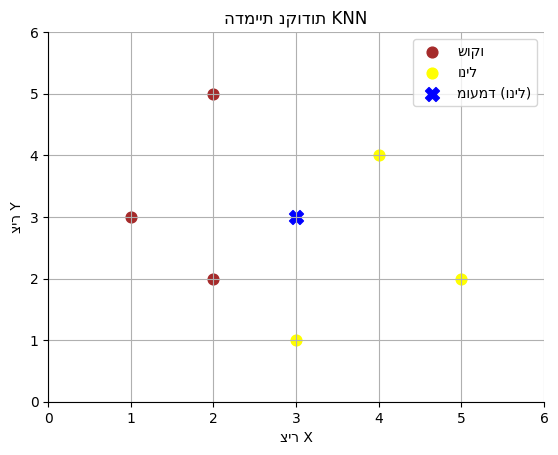

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# בסיס הנתונים
# כל שורה היא [x, y, class]
# שוקו נסמן כ-1, וניל כ-2 (או כל מספר אחר לצורך הדוגמה, רק כדי להבדיל)
data_points = np.array([
    [1, 3, 1],  # A - שוקו
    [2, 2, 1],  # B - שוקו
    [2, 5, 1],  # C - שוקו
    [3, 1, 2],  # D - וניל
    [4, 4, 2],  # E - וניל
    [5, 2, 2]   # F - וניל
])

# נקודת המועמד למיון
candidate_point = np.array([3, 3])

# K עבור KNN
k = 3

# מערך לאחסון המרחקים הריבועיים והקלאסים
# נגדיר אותו בגודל המתאים למספר הנקודות בבסיס הנתונים
sq_distances_and_classes = np.zeros((len(data_points), 2))

# חישוב המרחקים הריבועיים ושמירת הקלאס
for i in range(len(data_points)):
    # חישוב המרחק הריבועי האוקלידי
    dist_sq = (candidate_point[0] - data_points[i][0])**2 + (candidate_point[1] - data_points[i][1])**2

    # אחסון המרחק הריבועי והקלאס
    sq_distances_and_classes[i][0] = dist_sq
    sq_distances_and_classes[i][1] = data_points[i][2]

print("מערך מרחקים ריבועיים וקלאסים (לפני מיון):")
print(sq_distances_and_classes)

# מיון המערך לפי המרחק הריבועי (מהקטן לגדול)
# קבלת האינדקסים הממוינים
sorted_indices = np.argsort(sq_distances_and_classes[:, 0])

# יצירת מערך ממוין
sorted_data = sq_distances_and_classes[sorted_indices]

print("\nמערך ממוין לפי מרחק ריבועי:")
print(sorted_data)

# בדיקת K השכנים הקרובים ביותר
nearest_neighbors = sorted_data[:k]

print(f"\n{k} השכנים הקרובים ביותר:")
print(nearest_neighbors)

# ספירת הקלאסים בקרב K השכנים
class_counts = {}
for i in range(k):
    neighbor_class = int(nearest_neighbors[i][1]) # חשוב להמיר לאינט אם הקלאסים הם מספרים
    if neighbor_class in class_counts:
        class_counts[neighbor_class] += 1
    else:
        class_counts[neighbor_class] = 1

print("\nספירת קלאסים בקרב השכנים הקרובים:")
print(class_counts)

# קביעת הקלאס של נקודת המועמד (הקלאס עם הכי הרבה הופעות)
# נניח ששוקו הוא 1 ווניל הוא 2
class_mapping = {1: "שוקו", 2: "וניל"}

if class_counts: # לוודא שיש קלאסים לספור
    predicted_class_numeric = max(class_counts, key=class_counts.get)
    predicted_class = class_mapping.get(predicted_class_numeric, "קלאס לא ידוע")
    print(f"\nהנקודה P({candidate_point[0]},{candidate_point[1]}) מסווגת כ: {predicted_class}")
else:
    print("\nלא נמצאו שכנים לקביעת קלאס.")

# --- הדמיה (אופציונלי) ---
# ניצור הדמיה פשוטה של הנקודות
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xlim([0, 6]) # נתאם את הגבולות לגודל הנתונים
plt.ylim([0, 6])
plt.grid()

# נפרד את הנקודות לפי קלאס לצורך ההדמיה
chocolate_points = data_points[data_points[:, 2] == 1]
vanilla_points = data_points[data_points[:, 2] == 2]

plt.scatter(chocolate_points[:, 0], chocolate_points[:, 1], color="brown", marker="o", s=60, label="שוקו")
plt.scatter(vanilla_points[:, 0], vanilla_points[:, 1], color="yellow", marker="o", s=60, label="וניל")
plt.scatter(candidate_point[0], candidate_point[1], color="blue", marker="X", s=100, label=f"מועמד ({predicted_class})")

plt.title("הדמיית נקודות KNN")
plt.xlabel("ציר X")
plt.ylabel("ציר Y")
plt.legend()
plt.show()